# Machine Learning

## Supervised Learning

## Dimensionality reduction

## Linear Discriminant Analysis (LDA)

<img width="60%" class="imright" src="../images/Linear_Discriminant_Analysis_illustration.webp" srcset="../images/Linear_Discriminant_Analysis_illustration_800w.webp 800w,../images/Linear_Discriminant_Analysis_illustration_700w.webp 700w,../images/Linear_Discriminant_Analysis_illustration_600w.webp 600w,../images/Linear_Discriminant_Analysis_illustration_500w.webp 500w,../images/Linear_Discriminant_Analysis_illustration_400w.webp 400w,../images/Linear_Discriminant_Analysis_illustration_350w.webp 350w,../images/Linear_Discriminant_Analysis_illustration_300w.webp 300w" alt="Gives an overview about the idea of Linear Discriminant Analysis. The image shows the word LERAN where the single letters are shaded in different colours. The letters are demarcated by black lines which should emphasize the linear in linear discriminant analysis.">

### What is LDA

<div style="text-align: justify">
(Fishers) Linear Discriminant Analysis (LDA) searches for the projection of a dataset which maximizes the *between class scatter to within class scatter* ($\frac{S_B}{S_W}$) ratio of this projected dataset. The goal is to project/transform a dataset $A$ using a transformation matrix $w$ such that the ratio of between class scatter to within class scatter of the transformed dataset $Y=w^T*A$ is maximized. Hence our goal is to find the transformation matrix $w$ that accomplishes this. In Fisher's terms:<br>
*"Find the linear combination $Z=a^T*X$ such that the between class variance is maximized relative to the within class variance."*(Hastie, Tibshirani and Friedman, 2008, p.114). Therewith, LDA is like PCA which we have introduced in the last chapter with the difference, that LDA aims to find the projection of maximum separability. But slowly. Consider the following illustration which shows a dataset consisting of three different classes. We now want to have the within and between class scatter of this dataset.
<img width="60%" class="imright" src="../images/Linear_Discriminant_Analysis_concept_illustration.webp" srcset="../images/Linear_Discriminant_Analysis_concept_illustration_800w.webp 800w,../images/Linear_Discriminant_Analysis_concept_illustration_700w.webp 700w,../images/Linear_Discriminant_Analysis_concept_illustration_600w.webp 600w,../images/Linear_Discriminant_Analysis_concept_illustration_500w.webp 500w,../images/Linear_Discriminant_Analysis_concept_illustration_400w.webp 400w,../images/Linear_Discriminant_Analysis_concept_illustration_350w.webp 350w,../images/Linear_Discriminant_Analysis_concept_illustration_300w.webp 300w" alt=" Illustrates a dataset consisting of three different classes. Arrows across the datapoints of a special class illustrate the within class scatter while arrows between the mean of the dataset and the means of the different classes illustrate the between class scatter.">
So how do we get there? Let's take a look at the maths behind LDA.
</div>

### Maths behind LDA

<div style="text-align: justify">
As we can see in the illustration, we want to have a measure of the within and between class scatters. Therefore, we use the following two formulas for the between class scatter $S_B$ and the within class scatter $S_W$. Let's derive the meaning of them
<br>
<br>
$\underline{1. \ \ Scatter \ \  Within \ \ (S_W)}$
<br>
<br>
$S_W=\sum\limits_{classes \ \ c} \ \ \sum\limits_{j \in c}(x_j-\mu_c)(x_j-\mu_c)^T$
<br>
Here $classes \ \ c$ are the (in our case) three different classes (rectangle, triangles and circles). $\boldsymbol{x_j}$ is the value vector per instance per class (we have in our case two dimensions x and y, so for instance $x_1$ has the dimensionality 2x1). $\boldsymbol{\mu_c}$ represents the mean-vector of class $c$ and is a vector which contains the values of each dimension for each class. Hence, if for instance, class 1 is of shape 2x15 (15 values and two dimensions), the mean vector for class 1 is of shape 2x1 and hence we can subtract $\boldsymbol{\mu_c}$ from $\boldsymbol x_j$. We want to have this term as small as possible since the closer the datapoints per class are together, the easier it is to separate this class from the other classes. 
<br>
So figuratively speaking, we calculate the scatter matrix per class $c$ to get the scatter within each class (within the triangles, the rectangles and the circles --> Therefore we calculate $(x_j-\mu_c)(x_j-\mu_c)^T$ for each $j$ that is for each instance, which gives us for each instance $x_j$ a $mxm$ matrix assuming that each $x_j$ is of dimensionality $mx1$ where $m$ is the number of features in the dataset. We then sum up all these matrices to get the scatter within each class) and second sum up these scatter matrices to receive a measure of the scatter within the total dataset $S_W$. Mind that we calculated the scatter matrices and not the covariance matrices since then we must divide by n respectively n-1 but we didn't do that here. Nevertheless, the dimensionality of the scatter matrix is the same as for the covariance matrix. When a class has 2 dimensions, the scatter matrix is of shape (2x2) and consists of the elements:
<br>
$\begin{bmatrix}
scatter_{xx} & scatter_{xy} \\
scatter_{yx} & scatter_{yy}
\end{bmatrix}
$
<br>
As said, we calculate the scatter per class and then sum up all the per_class scatter matrices to receive a measure for the scatter within ($S_W$)
<br>
Let's derive this with Python code:
<br>
</div>

[[ 1.07646534 -0.05208045]
 [-0.05208045  0.45007299]]


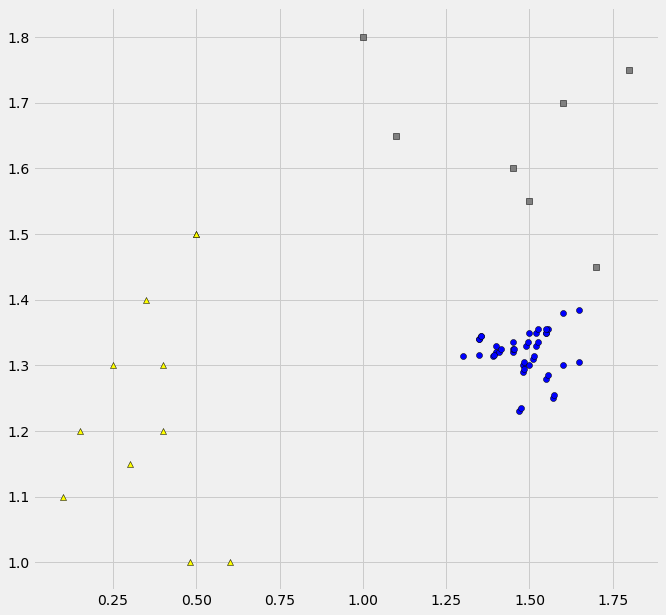

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')
np.random.seed(seed=42)

# Create data
rectangles = np.array([[1,1.5,1.7,1.45,1.1,1.6,1.8],[1.8,1.55,1.45,1.6,1.65,1.7,1.75]])
triangles = np.array([[0.1,0.5,0.25,0.4,0.3,0.6,0.35,0.15,0.4,0.5,0.48],[1.1,1.5,1.3,1.2,1.15,1.0,1.4,1.2,1.3,1.5,1.0]])
circles = np.array([[1.5,1.55,1.52,1.4,1.3,1.6,1.35,1.45,1.4,1.5,1.48,1.51,1.52,1.49,1.41,1.39,1.6,1.35,1.55,1.47,1.57,1.48,
                    1.55,1.555,1.525,1.45,1.35,1.65,1.355,1.455,1.45,1.55,1.485,1.515,1.525,1.495,1.415,1.395,1.65,1.355,1.555,1.475,1.575,1.485]
                    ,[1.3,1.35,1.33,1.32,1.315,1.30,1.34,1.32,1.33,1.35,1.30,1.31,1.35,1.33,1.32,1.315,1.38,1.34,1.28,1.23,1.25,1.29,
                     1.35,1.355,1.335,1.325,1.3155,1.305,1.345,1.325,1.335,1.355,1.305,1.315,1.355,1.335,1.325,1.3155,1.385,1.345,1.285,1.235,1.255,1.295]])

#Plot the data
fig = plt.figure(figsize=(10,10))
ax0 = fig.add_subplot(111)

ax0.scatter(rectangles[0],rectangles[1],marker='s',c='grey',edgecolor='black')
ax0.scatter(triangles[0],triangles[1],marker='^',c='yellow',edgecolor='black')
ax0.scatter(circles[0],circles[1],marker='o',c='blue',edgecolor='black')




# Calculate the mean vectors per class
mean_rectangles = np.mean(rectangles,axis=1).reshape(2,1) # Creates a 2x1 vector consisting of the means of the dimensions 
mean_triangles = np.mean(triangles,axis=1).reshape(2,1)
mean_circles = np.mean(circles,axis=1).reshape(2,1)

# Calculate the scatter matrices for the SW (Scatter within) and sum the elements up

scatter_rectangles = np.dot((rectangles-mean_rectangles),(rectangles-mean_rectangles).T)


# Mind that we do not calculate the covariance matrix here because then we have to divide by n or n-1 as shown below
#print((1/7)*np.dot((rectangles-mean_rectangles),(rectangles-mean_rectangles).T))
#print(np.var(rectangles[0],ddof=0))

scatter_triangles = np.dot((triangles-mean_triangles),(triangles-mean_triangles).T)
scatter_circles = np.dot((circles-mean_circles),(circles-mean_circles).T)

# Calculate the SW by adding the scatters within classes 
SW = scatter_triangles+scatter_circles+scatter_rectangles
print(SW)


plt.show()

<div style="text-align: justify">
$\underline{2. \ \ Scatter \ \  Between \ \ (S_B)}$
<br>
<br>
$S_B=\sum\limits_{classes \ \ c} N_c(\mu_c-\mu)(\mu_c-\mu)^T$
<br>
With this second formula figuratively speaking, we measure the scatter of the total dataset, that is the scatter between the classes and therewith how "far away" the single class-clusters are. Here $classes \ \ c$ are the different classes of our dataset (rectangles, triangles, circles). $\boldsymbol\mu_c$ is the mean per class which has dimensionality $2x1$ since for each dimension per class it consists one value. $\boldsymbol\mu$ is the mean of the total dataset and has dimensionality $2x1$ as well, since it also contains one value per dimension with the difference that we now consider all datapoints in the dataset and not only the datapoints belonging to one class $c$. The derivation of the $S_B$ is not that obvious but can be derived with:
Assume we create a total scatter matrix with $S_T=\sum\limits_{x}(\boldsymbol{x}-\boldsymbol \mu)(\boldsymbol{x}-\boldsymbol{\mu})^T$ where $\boldsymbol \mu$ is the mean of the total dataset. We know that $(\boldsymbol{x}-\boldsymbol{\mu})=(\boldsymbol{\mu_c-\boldsymbol{\mu}})+(\boldsymbol{x}-\boldsymbol{\mu_c})$.
For illustration purposes look at the following plot where we see that in a geometrical sense the equation holds true. Here the red line illustrates the left side of the equation while the yellow bold line represents the right side of the equation. The two lines align.

</div>

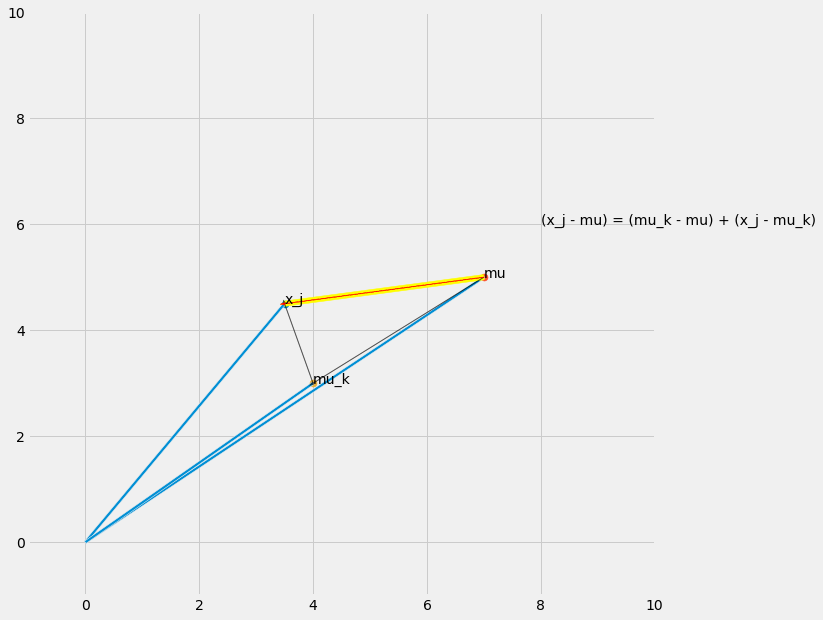

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')
np.random.seed(seed=42)



x_j = np.array([3.5,4.5])
mu = np.array([7,5])
mu_k = np.array([4,3])


fig = plt.figure(figsize=(10,10))
ax0 = fig.add_subplot(111)
ax0.set_xlim(-1,10)
ax0.set_ylim(-1,10)


for i in [x_j,mu,mu_k]:
    ax0.scatter(i[0],i[1],s=50)

ax0.annotate('x_j',x_j)
ax0.annotate('mu',mu)
ax0.annotate('mu_k',mu_k)
ax0.annotate('(x_j - mu) = (mu_k - mu) + (x_j - mu_k)',np.array(mu)+np.array([1,1]))

# Draw the position vectors 
for i in [x_j,mu,mu_k]:
    ax0.arrow(0,0,i[0],i[1],head_width=0.01,width=0.05)
    
# Draw the vectors
ax0.arrow(mu[0],mu[1],(x_j-mu)[0],(x_j-mu)[1],head_width=0.05,width=0.1,color='yellow') # xj_minus_mu
ax0.arrow(mu[0],mu[1],(mu_k-mu)[0],(mu_k-mu)[1],head_width=0.05,width=0.01,alpha=0.5,color='black') # mu_k_minus_mu
ax0.arrow(mu_k[0],mu_k[1],(x_j-mu_k)[0],(x_j-mu_k)[1],head_width=0.05,width=0.01,alpha=0.5,color='black') # xj_minus_mu_k

# If we now add up the vectors (mu_k-mu) and (x_j-mu_k) wee see that this vector alligns with the vector (x_k-mu)
mu_k_minus_mu = mu_k-mu
x_j_minus_mu_k = x_j-mu_k
res = (mu_k-mu)+(x_j-mu_k)
ax0.arrow(mu[0],mu[1],res[0],res[1],head_width=0.05,width=0.01,linestyle='-.',color='red')

plt.show()

<div style="text-align: justify">
If we insert this in our $S_T$ equation we get:
<br>
$S_T = \sum\limits_{classes \ \ c} \ \ \sum\limits_{x\in D_c}(\boldsymbol{x} - \boldsymbol{\mu_c} + \boldsymbol{\mu_c}-\boldsymbol{\mu})(\boldsymbol{x} - \boldsymbol{\mu_c} + \boldsymbol{\mu_c}-\boldsymbol{\mu})^T$
$= \ \ \underbrace{\sum\limits_{classes \ \ c} \ \ \sum\limits_{x\in D_c}(\boldsymbol{x} - \boldsymbol{\mu_c})(\boldsymbol{x} - \boldsymbol{\mu_c})^T}_{S_W}+\sum\limits_{classes \ \ c} \ \ \sum\limits_{x\in D_c}(\boldsymbol{\mu_c} - \boldsymbol{\mu})(\boldsymbol{\mu_c} - \boldsymbol{\mu})^T$
<br>
$= S_W + \underbrace{\sum\limits_{classes \ \ c}n_c (\boldsymbol{\mu_c} - \boldsymbol{\mu})(\boldsymbol{\mu_c} - \boldsymbol{\mu})^T}_{S_B}$
<br> 
Where $\sum\limits_{x\in D_c}$ was replaced by $n_c$ since $\boldsymbol{x}$ is a vector consisting of the values of one line of the dataset. Hence with $\sum\limits_{x\in D_c}$ we sum up $(\boldsymbol{\mu_c} - \boldsymbol{\mu})(\boldsymbol{\mu_c} - \boldsymbol{\mu})^T$ as many times ($n_c$) as there are rows in $c$ and hence we can simply say 
$n_c (\boldsymbol{\mu_c} - \boldsymbol{\mu})(\boldsymbol{\mu_c} - \boldsymbol{\mu})^T$.
<br>
Now it is sufficient to say that the total scatter ($S_T$) is the sum of $S_W$ and $S_B$ and hence we can define the second term of the equation above as $S_B$.
<br> 
Ok, now we know how we get $S_B$ and $S_W$ and we know that we want to maximize $\frac{S_B}{S_W}$ to get a as good as possible separation. Further we know that we want to achieve that by transforming our data to a lower dimensionality. But what we do not know until know is *how to do that*.<br>
Yet, we know that we can transform data using a transformation matrix $\boldsymbol{w}$. How the transformation works was described in the last chapter about [Principal Component Analysis](https://www.python-course.eu/principal_component_analysis.php) and can be looked up there. So, if we denote the transformed dataset as $\boldsymbol{Y}$, we find $\boldsymbol{Y}$ with $\boldsymbol{Y}=\boldsymbol{w}^T*\boldsymbol{X}$. From linear algebra we know, that we can say that the transformation using $\boldsymbol{w}$ is applied to each point in the dataset. That is, also to $\boldsymbol{\mu}$ and $\boldsymbol{ \mu}_k$. This is illustrated in the following figure where I have plotted an arbitrarily dataset (blue scatters) together with an arbitrarily $\mu_c$ and an arbitrarily $\mu$. 
</div>

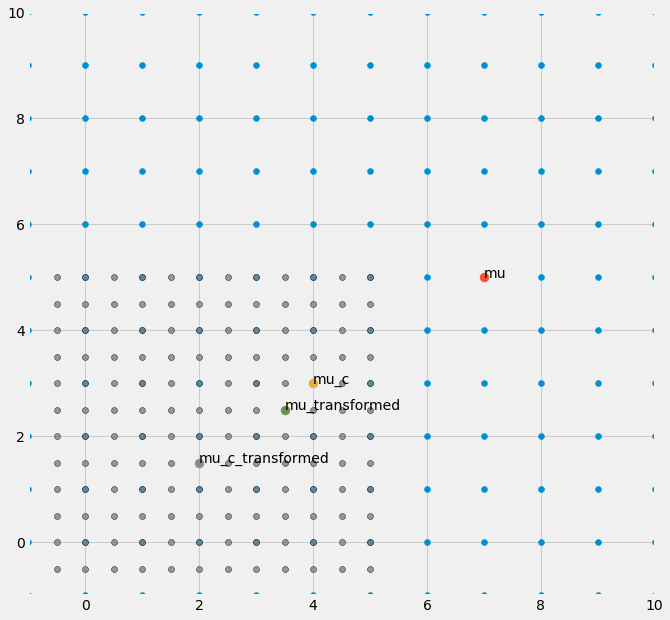

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')
np.random.seed(seed=42)



mu = np.array([7,5]).reshape(2,1)
mu_c = np.array([4,3]).reshape(2,1)


fig = plt.figure(figsize=(10,10))
ax0 = fig.add_subplot(111)
ax0.set_xlim(-1,10)
ax0.set_ylim(-1,10)

# Plot the meshgrid
X,Y = np.meshgrid(np.linspace(-1,10,num=12),np.linspace(-1,10,num=12))
data = np.array([X.reshape(1,144),Y.reshape(1,144)]).reshape(2,144)


ax0.scatter(X,Y)


# Transform the data using w
w = np.array([[0.5,0],[0,0.5]])


data_trans = np.dot(data.T,w)
mu_trans = np.dot(mu.reshape(2,1).T,w).reshape(2,1)
mu_c_trans = np.dot(mu_c.reshape(2,1).T,w).reshape(2,1)
ax0.scatter(data_trans[:,0],data_trans[:,1],alpha=0.8,color='grey',edgecolor='black')


# Plot mu, mu_trans, mu_k, and mu_k_trans
# Plot mu and mu_k

for i in [mu,mu_c,mu_trans,mu_c_trans]:
    ax0.scatter(i[0],i[1],s=80)

ax0.annotate('mu',[mu[0],mu[1]])
ax0.annotate('mu_c',mu_k)
ax0.annotate('mu_c_transformed',mu_c_trans)
ax0.annotate('mu_transformed',mu_trans)


plt.show()

<div style="text-align: justify">
As you can see, the above transformation using $\boldsymbol{w}$ squished the space by a factor of 0.5.
<br>
<br>
So applying this this transformation to our $x_j$, $\mu_c$ and $\mu$ in our $S_W$ and $S_B$ equations gives (mind that ${A^T}^T=A$):
<br>
<br>
$$S_W= \sum\limits_{classes \ \ c} \ \ \sum\limits_{j \in c}(\boldsymbol{w^T}(x_j-\mu_c))(\boldsymbol{w^T}(x_j-\mu_c))^T \ \ = \ \ \boldsymbol{w}^T S_W \boldsymbol{w}$$
<br>
and
<br>
<br>
$$S_B=\sum\limits_{classes \ \ c} N_c(\boldsymbol{w}^T(\mu_c-\mu))(\boldsymbol{w}^T(\mu_c-\mu))^T \ \ = \ \ \boldsymbol{w}^T S_B \boldsymbol{w}$$
<br>
Hence the equation $\frac{S_B}{S_W}$ becomes $$\frac{\boldsymbol{w}^T S_B \boldsymbol{w}}{\boldsymbol{w}^T S_W \boldsymbol{w}}$$
<br>
So what remains is how we can find the $\boldsymbol{w}$ that maximizes this equation. It turns out that $\boldsymbol{w}$ can be found by calculating the Eigenvectors of $S_W^{-1}S_B$ and how we can get here is for instance described in Marsland, S. (2015) p.132 as well as [here](http://www.svcl.ucsd.edu/courses/ece271B-F09/handouts/Dimensionality2.pdf). Nonetheless, when I got first in contact with this formula, it was kind of an obstacle and I wanted to know how I can get there. Hence here is the derivation where the solution is taken from [here](https://stats.stackexchange.com/questions/355054/derivation-of-s-w-1-s-b-during-the-calculation-of-lda/355134#355134):
<br>
Finding the maximum of <br>
$$\frac{\boldsymbol{w}^T S_B \boldsymbol{w}}{\boldsymbol{w}^T S_W \boldsymbol{w}}$$ is the same as maximizing the nominator while keeping the denominator constant and therewith can be denoted as kind of a constrained optimization problem with:
<br>
<br>
$\max_\limits{w}\boldsymbol{w}^TS_B\boldsymbol{w}$ with the constraint $\boldsymbol{w}^TS_W\boldsymbol{w}=K$
<br>
<br>
Bringing this constrained optimization problem into Lagrangian form gives:
<br>
<br>
$$L=\boldsymbol{w}^T S_B \boldsymbol{w}-\lambda(\boldsymbol{w}^T S_W \boldsymbol{w}-K)$$
<br>
<br>
Finding the maximum of a function can be accomplished by calculating and setting the derivative equal to zero. 
<br>
<br>
$$\frac{\delta L}{\delta \boldsymbol{w}}=S_B\boldsymbol{w}-\lambda S_W\boldsymbol{w}=\boldsymbol{0}$$
<br>
<br>
or
<br>
<br>
$$S_B\boldsymbol{w}=\lambda S_W \boldsymbol{w}$$
<br>
<br>
This is called a generalized Eigenvalue problem and can (providing that $S_W^{-1}$ exists) be written as:
<br>
<br>
$$S_W^{-1}S_B\boldsymbol{w}=\lambda\boldsymbol{w}$$
$$=$$
$$S_W^{-1}S_B\boldsymbol{w}-\lambda\boldsymbol{w}=0$$
<br>
Since $\lambda$ is a scalar but we want to have only matrices in our equation (to make the maths more easy --> We want to factorize $w$ in the next line and $\underline{not}$ multiplying $\lambda$ with $I$ would then lead to the situation that we must subtract a scalar from a matrix which is not possible) we want to multiply this with the identity matrix $I$ to get a matrix with the value of $\lambda$ on the diagonal.
<br>
<br>
$$S_W^{-1}S_B\boldsymbol{w}-\lambda\boldsymbol{I}\boldsymbol{w}=0$$
$$=$$
$$(S_W^{-1}S_B-\lambda\boldsymbol{I})\boldsymbol{w}=0$$
<br>
<br>
Solving this equation gives us the Eigenvalues ($\lambda$) and Eigenvectors ($\boldsymbol{w}$) and can be accomplished using [numpy.linalg.eig(a)](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.linalg.eig.html) setting $S_W^{-1}S_B$ for **a** or manually by calculating $det(S_W^{-1}S_B-\lambda\boldsymbol{I})=0$, solving for $\lambda$ which gives us the Eigenvalues, and inserting these Eigenvalues ($\lambda$) into $(S_W^{-1}S_B-\lambda\boldsymbol{I})\boldsymbol{w}=0$ gives us a linear set of equations. Solving these equations for $\boldsymbol{w}$ gives us the corresponding Eigenvectors.  But since numpy offers us a neat way to do that with just one line of code, for convenience purposes, I recommend to use numpy over the manual solution :).
<br>
<br>
Once we have found the $\boldsymbol{w}$ we can use this to transform our original dataset. The whole LDA process is summarized/divided by Raschka, S. (2015) p.139-140 in six steps:
</div>
1. Standardize the dataset (zero mean, standard deviation of 1)
2. Compute the total mean vector $\mu$ as well as the mean vectors per class $\mu_c$
3. Compute the scatter withing and scatter between matrices $S_B$ and $S_W$ 
4. Compute the eigenvalues and eigenvectors of $S_W^{-1}S_B$ to find the $\boldsymbol{w}$ which maximizes $\frac{\boldsymbol{w}^T S_B \boldsymbol{w}}{\boldsymbol{w}^T S_W \boldsymbol{w}}$
5. Select the Eigenvectors of the corresponding k largest Eigenvalues to create a $dxk$ dimensional transformation matrix $\boldsymbol{w}$ where the Eigenvectors are the columns of this matrix
6. Use $\boldsymbol{w}$ to transform the original $nxd$ dimensional dataset $\boldsymbol{x}$ into a lower, $nxk$ dimensional dataset $\boldsymbol{y}$  

<div style="text-align: justify">
So I think once we have now understand the concept behind LDA its time to make an example in Python following the proposed six steps. Therefore, we use the [UCI wine dataset](https://archive.ics.uci.edu/ml/datasets/wine) which has 13 dimensions. We want to find the transformation which makes the three different classes best linearly separable and plot this transformation in 2 dimensional space. 
</div>

### LDA with Python from scratch

/home/bernd/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/bernd/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


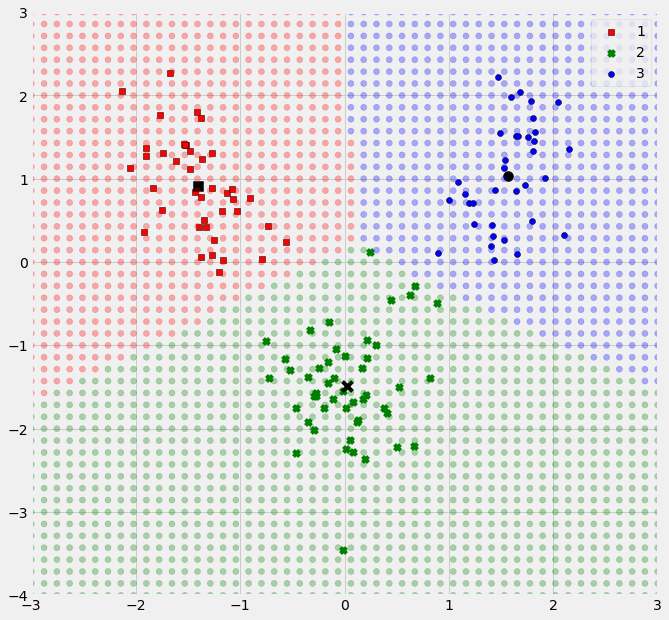

CPU times: user 1.57 s, sys: 12 ms, total: 1.58 s
Wall time: 926 ms


In [16]:
%%time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from matplotlib import style
from sklearn.model_selection import train_test_split
style.use('fivethirtyeight')
from sklearn.neighbors import KNeighborsClassifier

# 0. Load in the data and split the descriptive and the target feature
df = pd.read_csv('data/Wine.txt',sep=',',names=['target','Alcohol','Malic_acid','Ash','Akcakinity','Magnesium','Total_pheonols','Flavanoids','Nonflavanoids','Proanthocyanins','Color_intensity','Hue','OD280','Proline'])
X = df.iloc[:,1:].copy()
target = df['target'].copy()

X_train, X_test, y_train, y_test = train_test_split(X,target,test_size=0.3,random_state=0) 


# 1. Standardize the data
for col in X_train.columns:
    X_train[col] = StandardScaler().fit_transform(X_train[col].values.reshape(-1,1))



# 2. Compute the mean vector mu and the mean vector per class mu_k
mu = np.mean(X_train,axis=0).values.reshape(13,1) # Mean vector mu --> Since the data has been standardized, the data means are zero 


mu_k = []

for i,orchid in enumerate(np.unique(df['target'])):
    mu_k.append(np.mean(X_train.where(df['target']==orchid),axis=0))
mu_k = np.array(mu_k).T


# 3. Compute the Scatter within and Scatter between matrices
data_SW = []
Nc = []
for i,orchid in enumerate(np.unique(df['target'])):
    a = np.array(X_train.where(df['target']==orchid).dropna().values-mu_k[:,i].reshape(1,13))
    data_SW.append(np.dot(a.T,a))
    Nc.append(np.sum(df['target']==orchid))
SW = np.sum(data_SW,axis=0)

SB = np.dot(Nc*np.array(mu_k-mu),np.array(mu_k-mu).T)
   
# 4. Compute the Eigenvalues and Eigenvectors of SW^-1 SB
eigval, eigvec = np.linalg.eig(np.dot(np.linalg.inv(SW),SB))


    
# 5. Select the two largest eigenvalues 
eigen_pairs = [[np.abs(eigval[i]),eigvec[:,i]] for i in range(len(eigval))]
eigen_pairs = sorted(eigen_pairs,key=lambda k: k[0],reverse=True)
w = np.hstack((eigen_pairs[0][1][:,np.newaxis].real,eigen_pairs[1][1][:,np.newaxis].real)) # Select two largest


# 6. Transform the data with Y=X*w
Y = X_train.dot(w)

# Plot the data
fig = plt.figure(figsize=(10,10))
ax0 = fig.add_subplot(111)
ax0.set_xlim(-3,3)
ax0.set_ylim(-4,3)

for l,c,m in zip(np.unique(y_train),['r','g','b'],['s','x','o']):
    ax0.scatter(Y[0][y_train==l],
                Y[1][y_train==l],
               c=c, marker=m, label=l,edgecolors='black')
ax0.legend(loc='upper right')


# Plot the voroni spaces
means = []

for m,target in zip(['s','x','o'],np.unique(y_train)):
    means.append(np.mean(Y[y_train==target],axis=0))
    ax0.scatter(np.mean(Y[y_train==target],axis=0)[0],np.mean(Y[y_train==target],axis=0)[1],marker=m,c='black',s=100)
   
mesh_x, mesh_y = np.meshgrid(np.linspace(-3,3),np.linspace(-4,3)) 
mesh = []


for i in range(len(mesh_x)):
    for j in range(len(mesh_x[0])):
        date = [mesh_x[i][j],mesh_y[i][j]]
        mesh.append((mesh_x[i][j],mesh_y[i][j]))


NN = KNeighborsClassifier(n_neighbors=1)
NN.fit(means,['r','g','b'])        
predictions = NN.predict(np.array(mesh))

ax0.scatter(np.array(mesh)[:,0],np.array(mesh)[:,1],color=predictions,alpha=0.3)


plt.show()
    



<div style="text-align: justify">
As always, please interpret the above code as readible step by step implementation and do not claim it to be 100% efficient.
</div>

###  LDA with sklearn 

<div style="text-align: justify">
In the following section we will use the prepackaged [sklearn linear discriminant analysis](http://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html) method. The data preparation is the same as above. That is, we use the same dataset, split it in 70% training and 30% test data (Actually splitting the dataset is not mandatory in that case since we don't do any prediction - though, it is good practice and it would not negatively affect our results in this case - so we do it -.)
<div/>

(124, 2)
CPU times: user 81.6 ms, sys: 0 ns, total: 81.6 ms
Wall time: 24.1 ms


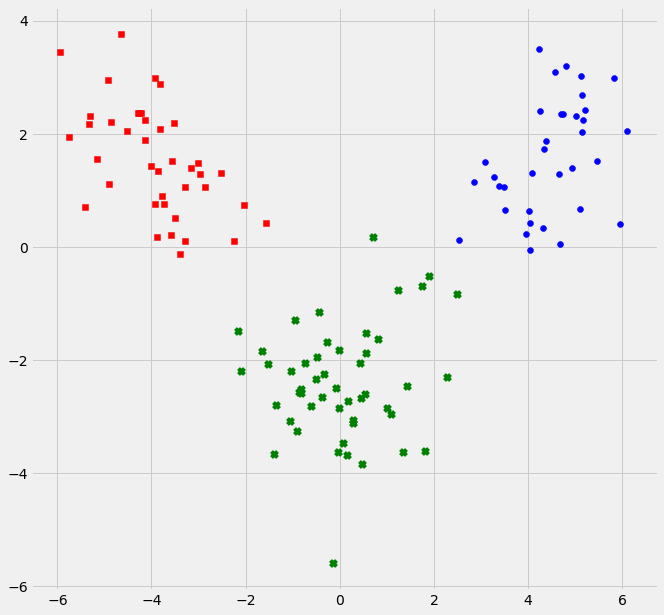

In [17]:
%%time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from matplotlib import style
from sklearn.model_selection import train_test_split
style.use('fivethirtyeight')
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# 0. Load in the data and split the descriptive and the target feature
df = pd.read_csv('data/Wine.txt',sep=',',names=['target','Alcohol','Malic_acid','Ash','Akcakinity','Magnesium','Total_pheonols','Flavanoids','Nonflavanoids','Proanthocyanins','Color_intensity','Hue','OD280','Proline'])
X = df.iloc[:,1:].copy()
target = df['target'].copy()

X_train, X_test, y_train, y_test = train_test_split(X,target,test_size=0.3,random_state=0) 

# 1. Instantiate the method and fit_transform the algotithm
LDA = LinearDiscriminantAnalysis(n_components=2) # The n_components key word gives us the projection to the n most discriminative directions in the dataset. We set this parameter to two to get a transformation in two dimensional space.  
data_projected = LDA.fit_transform(X_train,y_train)
print(data_projected.shape)
# PLot the transformed data
markers = ['s','x','o']
colors = ['r','g','b']

fig = plt.figure(figsize=(10,10))
ax0 = fig.add_subplot(111)

for l,m,c in zip(np.unique(y_train),markers,colors):
    ax0.scatter(data_projected[:,0][y_train==l],data_projected[:,1][y_train==l],c=c,marker=m)
    



<div style="text-align: justify">
As you can see, the actual implementation of LDA using sklearn took us only two lines of code and we get the same result as above. Congratulations, Done!
<div/>

### References

+ Duda, R., Hart, P. and Stork, D. (2000). *Pattern Classification*. New-York: Wiley-Interscience
+ Hastie, T., Tibshirani R. and Friedman, J. (2008). *The Elements of Statistical Learning*. 2nd ed. Stanford: Springer.
+ Marsland, S. (2015). *Machine Learning an Algorithmic Perspective*. 2nd ed. Boca Raton: CRC Press.
+ Bishop, C. (2006). *Pattern Recognition and Machine Learning*. Cambridge: Springer.
+ Raschka, S. (2015). *Python Machine Learning*. Birmingham: Packt Publishing.
+ https://www.youtube.com/watch?v=azXCzI57Yfc